# Generation of files for unit tests and table samples for documentation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import robout as rbt
from resources.insertMdTable import insertMdTable

fin = open(".\\resources\\README.tpl.md", "rt")
mdtext = fin.read()

In [2]:
df = pd.read_csv(".\\tests\\testSample.csv")
mdtext = insertMdTable(df.iloc[:5,:10], 'table1', mdtext, transpose=False, maxcols=10) 
df.iloc[:5,:10]

,id,time,AA,AB,AC,AD,AE,AF,AG,AH
0,x4425323655333165260,1515049200,2200.697738,-118.842503,-119.133622,0.917032,0.006693,845.738702,1,0.001244
1,x10230558070004111555,1515060000,3197.704570,-118.695724,-118.742952,0.938248,0.026903,1352.727210,2,0.001942
2,x18350715752638066598,1515006000,75.897193,-108.357568,-99.983267,0.427436,0.033111,149.165113,417,0.125376
3,x10230558070004111555,1515150000,2967.506365,-118.861917,-119.088891,0.944479,0.021121,1420.236740,1,0.000963
4,x16587885833987648653,1515186000,10395.426003,-119.959260,-120.211398,0.943700,0.069466,1943.044295,0,0.000000


In [3]:
# transform without standardization
rs = rbt.robout_scaler(standardization=False, ignore=["time"])
dfnorm = rs.fit_transform(df)
# dfnorm.head(20).to_csv(".\\tests\\nStdTestSample.csv", index=False)
mdtext = insertMdTable(dfnorm.iloc[:5,:10], 'table2', mdtext, transpose=False, maxcols=10) 
dfnorm.iloc[:5,:10]

,id,time,AA,AB,AC,AD,AE,AF,AG,AH
0,x4425323655333165260,1515049200,0.447265,0.530765,0.525592,0.491927,0.427231,0.420954,0.500000,0.514701
1,x10230558070004111555,1515060000,0.478404,0.541758,0.555454,0.528521,0.474284,0.495020,0.531209,0.537597
2,x18350715752638066598,1515006000,0.382548,0.963771,0.997523,0.031886,0.488868,0.325287,1.000000,1.000000
3,x10230558070004111555,1515150000,0.471191,0.529309,0.529025,0.539229,0.460737,0.504971,0.500000,0.505480
4,x16587885833987648653,1515186000,0.693830,0.446921,0.442911,0.537891,0.573860,0.581309,0.468791,0.473809


In [4]:
# transform with standardization
rs = rbt.robout_scaler(standardization=True, ignore=["time"])
dfnorm = rs.fit_transform(df)
# dfnorm.head(20).to_csv(".\\tests\\stdTestSample.csv", index=False)
mdtext = insertMdTable(dfnorm.iloc[:5,:10], 'table3', mdtext, transpose=False, maxcols=10) 
dfnorm.iloc[:5,:10]

,id,time,AA,AB,AC,AD,AE,AF,AG,AH
0,x4425323655333165260,1515049200,-0.713919,-0.043369,-0.093889,0.210433,-0.919474,-0.796689,-0.332058,-0.267370
1,x10230558070004111555,1515060000,-0.398219,0.037300,0.107336,0.499845,-0.495718,-0.117005,-0.119923,-0.102128
2,x18350715752638066598,1515006000,-1.370034,3.134124,3.086219,-3.427813,-0.364370,-1.674605,3.066506,3.235078
3,x10230558070004111555,1515150000,-0.471353,-0.054057,-0.070759,0.584527,-0.617717,-0.025686,-0.332058,-0.333916
4,x16587885833987648653,1515186000,1.785817,-0.658638,-0.651033,0.573946,0.401057,0.674849,-0.544192,-0.562488


In [5]:
# inverse transform
rs = rbt.robout_scaler(standardization=True, ignore=["time"])
dfnorm = rs.fit_transform(df)
dfrec = rs.inverse_transform(dfnorm)
# dfrec.head(20).to_csv(".\\tests\\recTestSample.csv", index=False)
mdtext = insertMdTable(dfrec.iloc[:5,:10], 'table4', mdtext, transpose=False, maxcols=10) 
dfrec.iloc[:5,:10]

,id,time,AA,AB,AC,AD,AE,AF,AG,AH
0,x4425323655333165260,1515049200,2200.697738,-118.842503,-119.133622,0.917032,0.006693,845.738702,1,1.243781e-03
1,x10230558070004111555,1515060000,3197.704570,-118.695724,-118.742952,0.938248,0.026903,1352.727210,2,1.941748e-03
2,x18350715752638066598,1515006000,75.897193,-108.357568,-99.983267,0.427436,0.033111,149.165113,92,1.253758e-01
3,x10230558070004111555,1515150000,2967.506365,-118.861917,-119.088891,0.944479,0.021121,1420.236740,1,9.633911e-04
4,x16587885833987648653,1515186000,10395.426003,-119.959260,-120.211398,0.943700,0.069466,1943.044295,0,-3.252607e-19


# Save figures for documentation

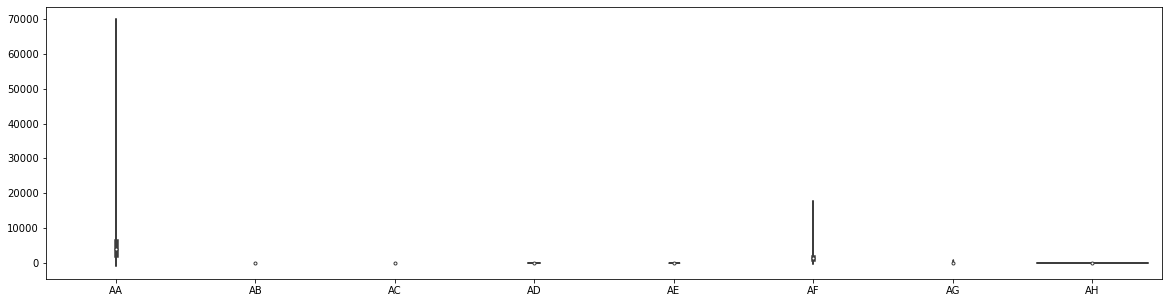

In [6]:
f, ax = plt.subplots(figsize=(20, 5))
sns.violinplot(data=df.iloc[:,2:10])
f.savefig(".\\resources\\fig1.png")

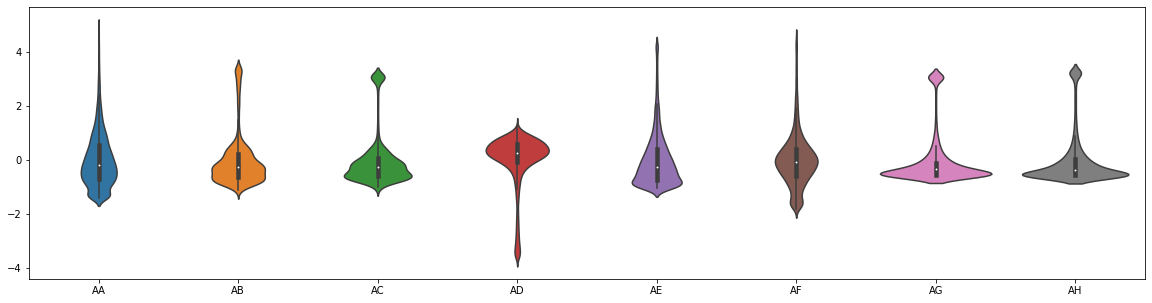

In [7]:
f, ax = plt.subplots(figsize=(20, 5))
sns.violinplot(data=dfnorm.iloc[:,2:10])
f.savefig(".\\resources\\fig2.png")

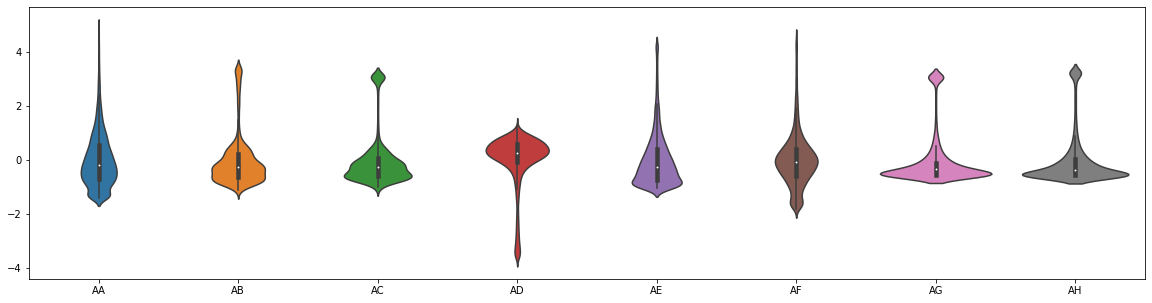

In [8]:
dfnorm = rbt.robout_scaler(standardization=True, ignore=["time"]).fit_transform(df)
f, ax = plt.subplots(figsize=(20, 5))
sns.violinplot(data=dfnorm.iloc[:,2:10])
f.savefig(".\\resources\\fig3.png")

# Insert tables in the README.md

In [9]:
#close the input file
fin.close()
#open the input file in write mode
fin = open("README.md", "wt")
#overrite the input file with the resulting data
fin.write(mdtext)
#close the file
fin.close()

# Run unit tests

In [10]:
!pytest

============================= test session starts =============================
platform win32 -- Python 3.8.2, pytest-6.0.1, py-1.9.0, pluggy-0.13.1
rootdir: C:\scicolab\robout
collected 7 items

tests\test_robout.py .......                                             [100%]

============================= 7 passed in 17.31s ==============================
